In [1]:
import numpy as np
import matplotlib.pyplot as plt
import midi

In [2]:
def marhop(x, y, a, b, c, i_max):
    arx = [x]
    ary = [y]
    i = 0
    while i < i_max:
        x = y - np.sign(x) * np.sqrt(abs(b*x-c))
        y = a - arx[i]
        arx.append(x)
        ary.append(y)
        i += 1
    return arx, ary

In [3]:
arx, ary = marhop(x=0, y=0, a=8, b=4, c=0, i_max=2000)

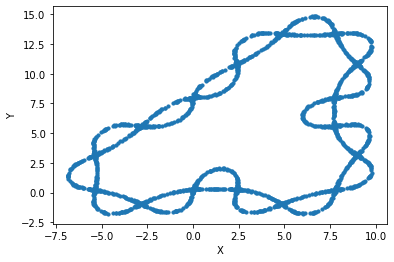

In [4]:
plt.scatter(arx, ary,s=10)
plt.xlabel("X")
plt.ylabel("Y")
plt.savefig('Hopalong_1.tiff', dpi=300, format='tiff')

In [5]:
def mapp(x, x_min, x_max, r_min, r_max):
    x_span = x_max - x_min
    r_span = r_max - r_min
    x_scaled = []
    for i in x:
        x_0_1 = (i - x_min)/x_span
        x_range = r_min + x_0_1*r_span
        x_scaled.append(int(x_range))
        
    return x_scaled

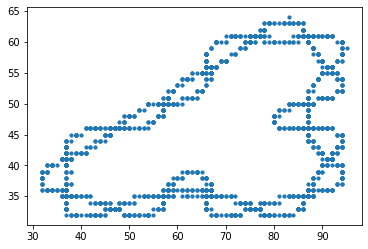

In [6]:
arx = mapp(arx, min(arx), max(arx), 32, 95)
ary = mapp(ary, min(ary), max(ary), 32, 64)
plt.scatter(arx, ary, s=10)

In [7]:
def gettmidi(arx, ary, gap=2, name=''):
    pattern = midi.Pattern()
    track_1 = midi.Track()
    track_2 = midi.Track()
    pattern.append(track_1)
    pattern.append(track_2)
    i = 0

    for x_pitch, y_velocity in zip(arx, ary):
        if x_pitch < 64 and i%gap==0:
            on = midi.NoteOnEvent(tick=0, velocity=y_velocity*2, pitch=x_pitch)
            track_1.append(on)
            off = midi.NoteOffEvent(tick=400 if x_pitch<48 else 200, pitch=x_pitch)
            track_1.append(off)
        elif i%gap==0:
            on = midi.NoteOnEvent(tick=0, velocity=y_velocity, pitch=x_pitch)
            track_2.append(on)
            off = midi.NoteOffEvent(tick=200 if x_pitch<80 else 100, pitch=x_pitch)
            track_2.append(off)
        i+=1

    eot = midi.EndOfTrackEvent(tick=200)
    track_1.append(eot)
    track_2.append(eot)
    print(pattern)
    midi.write_midifile("example"+ str(name) + ".mid", pattern)

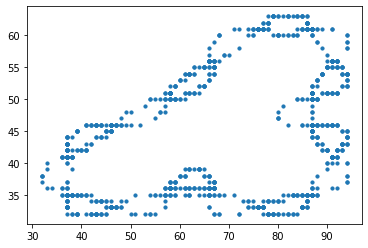

In [8]:
arx_1 = []
ary_1 = []
i=0
for x,y in zip(arx,ary):
    if i%2==0:
        arx_1.append(x)
        ary_1.append(y)
    i+=1
plt.scatter(arx_1,ary_1,s=10)

In [9]:
gettmidi(arx, ary, 2, '_marhop_1')

midi.Pattern(format=1, resolution=220, tracks=\
[midi.Track(\
  [midi.NoteOnEvent(tick=0, channel=0, data=[57, 70]),
   midi.NoteOffEvent(tick=200, channel=0, data=[57, 0]),
   midi.NoteOnEvent(tick=0, channel=0, data=[46, 92]),
   midi.NoteOffEvent(tick=400, channel=0, data=[46, 0]),
   midi.NoteOnEvent(tick=0, channel=0, data=[37, 70]),
   midi.NoteOffEvent(tick=400, channel=0, data=[37, 0]),
   midi.NoteOnEvent(tick=0, channel=0, data=[59, 70]),
   midi.NoteOffEvent(tick=200, channel=0, data=[59, 0]),
   midi.NoteOnEvent(tick=0, channel=0, data=[39, 90]),
   midi.NoteOffEvent(tick=400, channel=0, data=[39, 0]),
   midi.NoteOnEvent(tick=0, channel=0, data=[39, 64]),
   midi.NoteOffEvent(tick=400, channel=0, data=[39, 0]),
   midi.NoteOnEvent(tick=0, channel=0, data=[59, 104]),
   midi.NoteOffEvent(tick=200, channel=0, data=[59, 0]),
   midi.NoteOnEvent(tick=0, channel=0, data=[37, 84]),
   midi.NoteOffEvent(tick=400, channel=0, data=[37, 0]),
   midi.NoteOnEvent(tick=0, channel=0, da

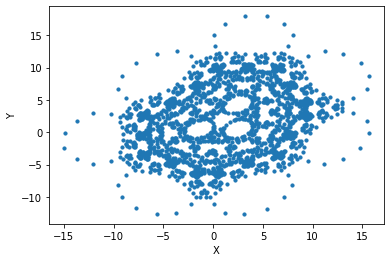

In [10]:
arx, ary = marhop(x=0, y=0, a=3, b=2, c=1, i_max=2000)
plt.scatter(arx, ary, s=10)
plt.xlabel("X")
plt.ylabel("Y")
plt.savefig('Hopalong_2.tiff', dpi=300, format='tiff')

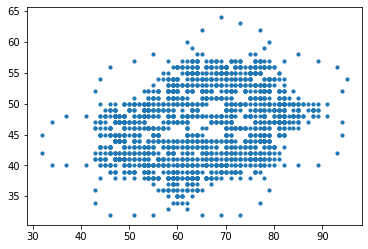

In [11]:
arx = mapp(arx, min(arx), max(arx), 32, 95)
ary = mapp(ary, min(ary), max(ary), 32, 64)
plt.scatter(arx, ary, s=10)

In [12]:
gettmidi(arx, ary, 2,'_marhop_2')

midi.Pattern(format=1, resolution=220, tracks=\
[midi.Track(\
  [midi.NoteOnEvent(tick=0, channel=0, data=[62, 90]),
   midi.NoteOffEvent(tick=200, channel=0, data=[62, 0]),
   midi.NoteOnEvent(tick=0, channel=0, data=[61, 94]),
   midi.NoteOffEvent(tick=200, channel=0, data=[61, 0]),
   midi.NoteOnEvent(tick=0, channel=0, data=[56, 90]),
   midi.NoteOffEvent(tick=200, channel=0, data=[56, 0]),
   midi.NoteOnEvent(tick=0, channel=0, data=[59, 88]),
   midi.NoteOffEvent(tick=200, channel=0, data=[59, 0]),
   midi.NoteOnEvent(tick=0, channel=0, data=[62, 90]),
   midi.NoteOffEvent(tick=200, channel=0, data=[62, 0]),
   midi.NoteOnEvent(tick=0, channel=0, data=[57, 94]),
   midi.NoteOffEvent(tick=200, channel=0, data=[57, 0]),
   midi.NoteOnEvent(tick=0, channel=0, data=[56, 88]),
   midi.NoteOffEvent(tick=200, channel=0, data=[56, 0]),
   midi.NoteOnEvent(tick=0, channel=0, data=[63, 98]),
   midi.NoteOffEvent(tick=200, channel=0, data=[63, 0]),
   midi.NoteOnEvent(tick=0, channel=0, dat

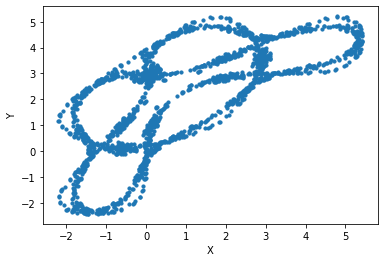

In [13]:
arx, ary = marhop(x=0, y=0, a=3, b=6, c=0, i_max=2000)
plt.scatter(arx, ary, s=10)
plt.xlabel("X")
plt.ylabel("Y")
plt.savefig('Hopalong_3.tiff', dpi=300, format='tiff')

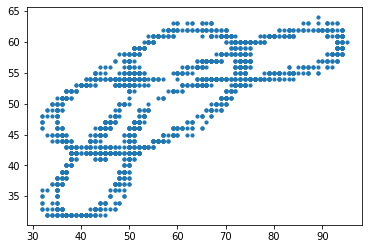

In [14]:
arx = mapp(arx, min(arx), max(arx), 32, 95)
ary = mapp(ary, min(ary), max(ary), 32, 64)
plt.scatter(arx, ary, s=10)

In [15]:
gettmidi(arx, ary, 2,'_marhop_3')

midi.Pattern(format=1, resolution=220, tracks=\
[midi.Track(\
  [midi.NoteOnEvent(tick=0, channel=0, data=[50, 84]),
   midi.NoteOffEvent(tick=200, channel=0, data=[50, 0]),
   midi.NoteOnEvent(tick=0, channel=0, data=[43, 106]),
   midi.NoteOffEvent(tick=400, channel=0, data=[43, 0]),
   midi.NoteOnEvent(tick=0, channel=0, data=[36, 66]),
   midi.NoteOffEvent(tick=400, channel=0, data=[36, 0]),
   midi.NoteOnEvent(tick=0, channel=0, data=[52, 112]),
   midi.NoteOffEvent(tick=200, channel=0, data=[52, 0]),
   midi.NoteOnEvent(tick=0, channel=0, data=[43, 92]),
   midi.NoteOffEvent(tick=400, channel=0, data=[43, 0]),
   midi.NoteOnEvent(tick=0, channel=0, data=[45, 82]),
   midi.NoteOffEvent(tick=400, channel=0, data=[45, 0]),
   midi.NoteOnEvent(tick=0, channel=0, data=[53, 94]),
   midi.NoteOffEvent(tick=200, channel=0, data=[53, 0]),
   midi.NoteOnEvent(tick=0, channel=0, data=[38, 102]),
   midi.NoteOffEvent(tick=400, channel=0, data=[38, 0]),
   midi.NoteOnEvent(tick=0, channel=0, 

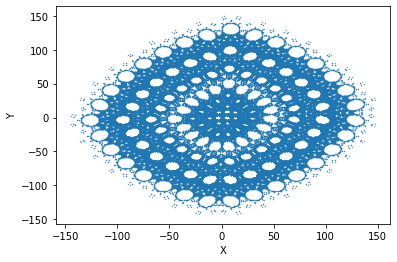

In [16]:
arx, ary = marhop(x=0, y=0, a=5, b=1, c=20, i_max=200000)
plt.scatter(arx, ary, s=0.1)
plt.xlabel("X")
plt.ylabel("Y")
plt.savefig('Hopalong_4.tiff', dpi=300, format='tiff')

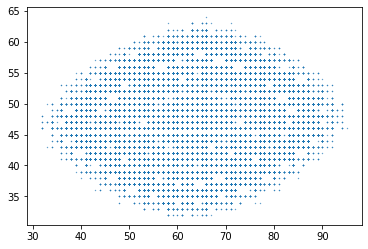

In [17]:
arx = mapp(arx, min(arx), max(arx), 32, 95)
ary = mapp(ary, min(ary), max(ary), 32, 64)
plt.scatter(arx, ary, s=0.1)

In [18]:
gettmidi(arx, ary, 2,'_marhop_4')

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [19]:
def man_jul(x, y, cx, cy, i_max):
    i = 0
    arx = [x]
    ary = [y]
    while i < i_max and (x**2 + y**2)<2:
        x = x**2 - y**2 + cx
        y = 2*arx[i]*y + cy
        arx.append(x)
        ary.append(y)
        i+=1
    if i==i_max:
        return i_max, arx, ary
    else:
        return i, arx, ary

In [20]:
manx = []
many = []
arx_in = []
ary_in = []
arx_out = []
ary_out = []
clr = []
i_max = 1000
for cx in range(-200, 100, 1):
    for cy in range(-100, 100, 1):
        manx.append(cx/100)
        many.append(cy/100)
        manr = man_jul(0, 0, cx/100, cy/100, i_max)
        clr.append(manr[0])
        if manr[0] == i_max:
            arx_in.append(manr[1])
            ary_in.append(manr[2])
        elif manr[0] > 10:
            arx_out.append(manr[1])
            ary_out.append(manr[2])

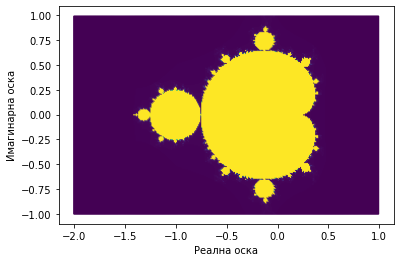

In [21]:
plt.scatter(manx, many, c=clr, s=1)
plt.xlabel("Реална оска")
plt.ylabel("Имагинарна оска")
plt.savefig('Mandelbrot.tiff', dpi=300, format='tiff')

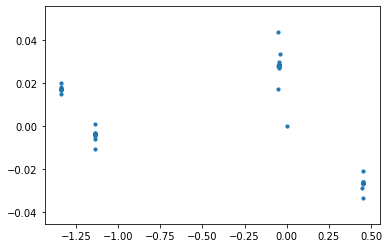

In [22]:
nx = arx_in[30]
ny = ary_in[30]
plt.scatter(nx, ny, s=10)

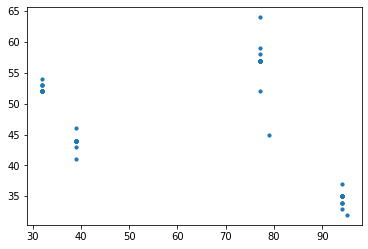

In [23]:
nx = mapp(nx, min(nx), max(nx), 32, 95)
ny = mapp(ny, min(ny), max(ny), 32, 64)
plt.scatter(nx, ny, s=10)

In [24]:
gettmidi(nx, ny, 2,'_man_1')

midi.Pattern(format=1, resolution=220, tracks=\
[midi.Track(\
  [midi.EndOfTrackEvent(tick=200, data=[])]),
 midi.Track(\
  [midi.NoteOnEvent(tick=0, channel=0, data=[79, 45]),
   midi.NoteOffEvent(tick=200, channel=0, data=[79, 0]),
   midi.NoteOnEvent(tick=0, channel=0, data=[95, 32]),
   midi.NoteOffEvent(tick=100, channel=0, data=[95, 0]),
   midi.NoteOnEvent(tick=0, channel=0, data=[77, 64]),
   midi.NoteOffEvent(tick=200, channel=0, data=[77, 0]),
   midi.NoteOnEvent(tick=0, channel=0, data=[94, 37]),
   midi.NoteOffEvent(tick=100, channel=0, data=[94, 0]),
   midi.NoteOnEvent(tick=0, channel=0, data=[77, 52]),
   midi.NoteOffEvent(tick=200, channel=0, data=[77, 0]),
   midi.NoteOnEvent(tick=0, channel=0, data=[94, 33]),
   midi.NoteOffEvent(tick=100, channel=0, data=[94, 0]),
   midi.NoteOnEvent(tick=0, channel=0, data=[77, 59]),
   midi.NoteOffEvent(tick=200, channel=0, data=[77, 0]),
   midi.NoteOnEvent(tick=0, channel=0, data=[94, 35]),
   midi.NoteOffEvent(tick=100, channel=

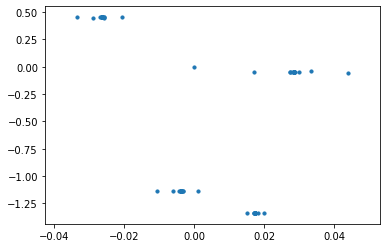

In [25]:
nx = ary_in[30]
ny = arx_in[30]
plt.scatter(nx, ny, s=10)

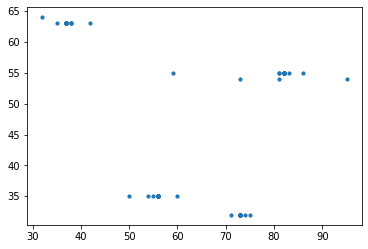

In [26]:
nx = mapp(nx, min(nx), max(nx), 32, 95)
ny = mapp(ny, min(ny), max(ny), 32, 64)
plt.scatter(nx, ny, s=10)

In [27]:
gettmidi(nx, ny, 2,'_man_2')

midi.Pattern(format=1, resolution=220, tracks=\
[midi.Track(\
  [midi.NoteOnEvent(tick=0, channel=0, data=[59, 110]),
   midi.NoteOffEvent(tick=200, channel=0, data=[59, 0]),
   midi.NoteOnEvent(tick=0, channel=0, data=[32, 128]),
   midi.NoteOffEvent(tick=400, channel=0, data=[32, 0]),
   midi.NoteOnEvent(tick=0, channel=0, data=[42, 126]),
   midi.NoteOffEvent(tick=400, channel=0, data=[42, 0]),
   midi.NoteOnEvent(tick=0, channel=0, data=[35, 126]),
   midi.NoteOffEvent(tick=400, channel=0, data=[35, 0]),
   midi.NoteOnEvent(tick=0, channel=0, data=[38, 126]),
   midi.NoteOffEvent(tick=400, channel=0, data=[38, 0]),
   midi.NoteOnEvent(tick=0, channel=0, data=[38, 126]),
   midi.NoteOffEvent(tick=400, channel=0, data=[38, 0]),
   midi.NoteOnEvent(tick=0, channel=0, data=[37, 126]),
   midi.NoteOffEvent(tick=400, channel=0, data=[37, 0]),
   midi.NoteOnEvent(tick=0, channel=0, data=[38, 126]),
   midi.NoteOffEvent(tick=400, channel=0, data=[38, 0]),
   midi.NoteOnEvent(tick=0, channe

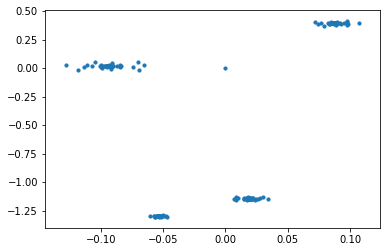

In [28]:
nx = ary_in[80]
ny = arx_in[80]
plt.scatter(nx, ny, s=10)

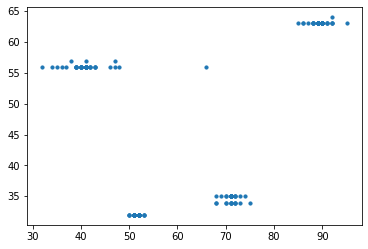

In [29]:
nx = mapp(nx, min(nx), max(nx), 32, 95)
ny = mapp(ny, min(ny), max(ny), 32, 64)
plt.scatter(nx, ny, s=10)

In [30]:
gettmidi(nx, ny, 2,'_man_3')

midi.Pattern(format=1, resolution=220, tracks=\
[midi.Track(\
  [midi.NoteOnEvent(tick=0, channel=0, data=[47, 114]),
   midi.NoteOffEvent(tick=400, channel=0, data=[47, 0]),
   midi.NoteOnEvent(tick=0, channel=0, data=[38, 114]),
   midi.NoteOffEvent(tick=400, channel=0, data=[38, 0]),
   midi.NoteOnEvent(tick=0, channel=0, data=[32, 112]),
   midi.NoteOffEvent(tick=400, channel=0, data=[32, 0]),
   midi.NoteOnEvent(tick=0, channel=0, data=[34, 112]),
   midi.NoteOffEvent(tick=400, channel=0, data=[34, 0]),
   midi.NoteOnEvent(tick=0, channel=0, data=[47, 112]),
   midi.NoteOffEvent(tick=400, channel=0, data=[47, 0]),
   midi.NoteOnEvent(tick=0, channel=0, data=[48, 112]),
   midi.NoteOffEvent(tick=200, channel=0, data=[48, 0]),
   midi.NoteOnEvent(tick=0, channel=0, data=[41, 114]),
   midi.NoteOffEvent(tick=400, channel=0, data=[41, 0]),
   midi.NoteOnEvent(tick=0, channel=0, data=[36, 112]),
   midi.NoteOffEvent(tick=400, channel=0, data=[36, 0]),
   midi.NoteOnEvent(tick=0, channe

In [31]:
def jull(cx, cy, i_max):
    julx = []
    july = []
    arx_in = []
    ary_in = []
    arx_out = []
    ary_out = []
    clr = []
    for x in range(-150, 150, 1):
        for y in range(-150, 150, 1):
            julx.append(x/100)
            july.append(y/100)
            julr = man_jul(x/100, y/100, cx, cy, i_max)
            clr.append(julr[0])
            if julr[0] == i_max:
                arx_in.append(julr[1])
                ary_in.append(julr[2])
            elif julr[0] > 10:
                arx_out.append(julr[1])
                ary_out.append(julr[2])
    return julx, july, arx_in, ary_in, arx_out, ary_out, clr

In [32]:
julx, july, arx_in, ary_in, arx_out, ary_out, clr = jull(cx=-0.12, cy=0.75, i_max=1000)

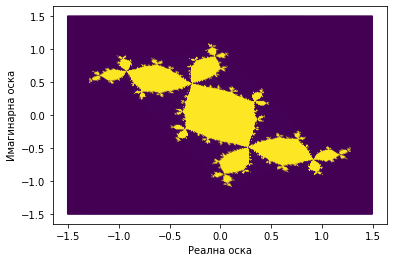

In [33]:
plt.scatter(julx, july, c=clr, s=1)
plt.xlabel("Реална оска")
plt.ylabel("Имагинарна оска")
plt.savefig('Julia_1.tiff', dpi=300, format='tiff')

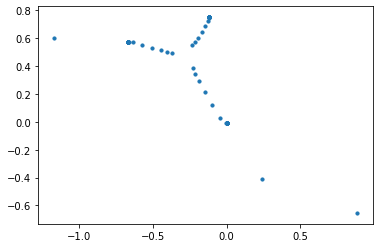

In [34]:
nx = arx_in[80]
ny = ary_in[80]
plt.scatter(nx, ny, s=10)

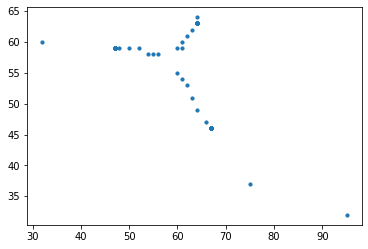

In [35]:
nx = mapp(nx, min(nx), max(nx), 32, 95)
ny = mapp(ny, min(ny), max(ny), 32, 64)
plt.scatter(nx, ny, s=10)

In [36]:
gettmidi(nx, ny, 1,'_jul_1')

midi.Pattern(format=1, resolution=220, tracks=\
[midi.Track(\
  [midi.NoteOnEvent(tick=0, channel=0, data=[32, 120]),
   midi.NoteOffEvent(tick=400, channel=0, data=[32, 0]),
   midi.NoteOnEvent(tick=0, channel=0, data=[60, 118]),
   midi.NoteOffEvent(tick=200, channel=0, data=[60, 0]),
   midi.NoteOnEvent(tick=0, channel=0, data=[56, 116]),
   midi.NoteOffEvent(tick=200, channel=0, data=[56, 0]),
   midi.NoteOnEvent(tick=0, channel=0, data=[60, 110]),
   midi.NoteOffEvent(tick=200, channel=0, data=[60, 0]),
   midi.NoteOnEvent(tick=0, channel=0, data=[61, 118]),
   midi.NoteOffEvent(tick=200, channel=0, data=[61, 0]),
   midi.NoteOnEvent(tick=0, channel=0, data=[55, 116]),
   midi.NoteOffEvent(tick=200, channel=0, data=[55, 0]),
   midi.NoteOnEvent(tick=0, channel=0, data=[61, 108]),
   midi.NoteOffEvent(tick=200, channel=0, data=[61, 0]),
   midi.NoteOnEvent(tick=0, channel=0, data=[61, 120]),
   midi.NoteOffEvent(tick=200, channel=0, data=[61, 0]),
   midi.NoteOnEvent(tick=0, channe

In [37]:
julx, july, arx_in, ary_in, arx_out, ary_out, clr = jull(cx=-0.4, cy=0.6, i_max=1000)

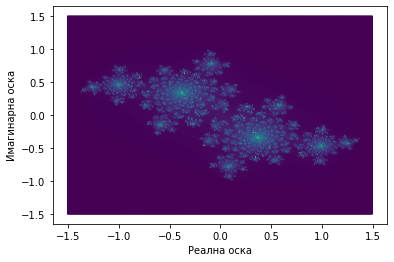

In [38]:
plt.scatter(julx, july, c=clr, s=1)
plt.xlabel("Реална оска")
plt.ylabel("Имагинарна оска")
plt.savefig('Julia_2.tiff', dpi=300, format='tiff')

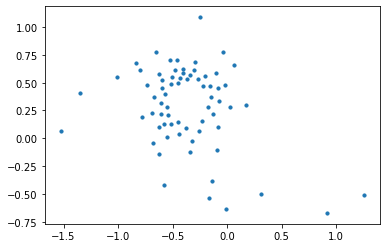

In [39]:
nx = arx_out[10]
ny = ary_out[10]
plt.scatter(nx, ny, s=10)

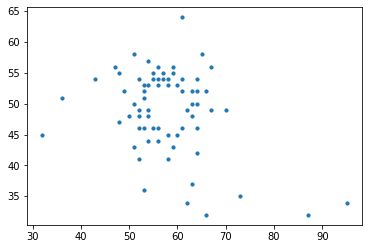

In [40]:
nx = mapp(nx, min(nx), max(nx), 32, 95)
ny = mapp(ny, min(ny), max(ny), 32, 64)
plt.scatter(nx, ny, s=10)

In [41]:
gettmidi(nx, ny, 2,'_jul_2')

midi.Pattern(format=1, resolution=220, tracks=\
[midi.Track(\
  [midi.NoteOnEvent(tick=0, channel=0, data=[36, 102]),
   midi.NoteOffEvent(tick=400, channel=0, data=[36, 0]),
   midi.NoteOnEvent(tick=0, channel=0, data=[48, 110]),
   midi.NoteOffEvent(tick=200, channel=0, data=[48, 0]),
   midi.NoteOnEvent(tick=0, channel=0, data=[54, 114]),
   midi.NoteOffEvent(tick=200, channel=0, data=[54, 0]),
   midi.NoteOnEvent(tick=0, channel=0, data=[62, 98]),
   midi.NoteOffEvent(tick=200, channel=0, data=[62, 0]),
   midi.NoteOnEvent(tick=0, channel=0, data=[56, 92]),
   midi.NoteOffEvent(tick=200, channel=0, data=[56, 0]),
   midi.NoteOnEvent(tick=0, channel=0, data=[53, 102]),
   midi.NoteOffEvent(tick=200, channel=0, data=[53, 0]),
   midi.NoteOnEvent(tick=0, channel=0, data=[58, 106]),
   midi.NoteOffEvent(tick=200, channel=0, data=[58, 0]),
   midi.NoteOnEvent(tick=0, channel=0, data=[63, 100]),
   midi.NoteOffEvent(tick=200, channel=0, data=[63, 0]),
   midi.NoteOnEvent(tick=0, channel=

In [42]:
julx, july, arx_in, ary_in, arx_out, ary_out, clr = jull(cx=-0.8, cy=0.156, i_max=1000)

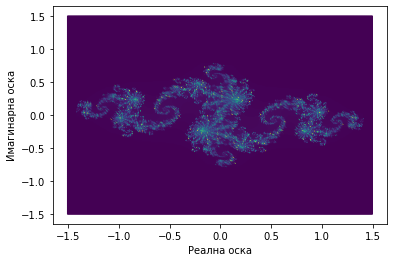

In [43]:
plt.scatter(julx, july, c=clr, s=1)
plt.xlabel("Реална оска")
plt.ylabel("Имагинарна оска")
plt.savefig('Julia_3.tiff', dpi=300, format='tiff')

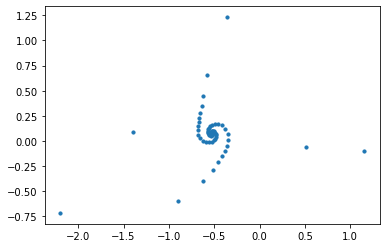

In [44]:
nx = arx_out[10]
ny = ary_out[10]
plt.scatter(nx, ny, s=10)

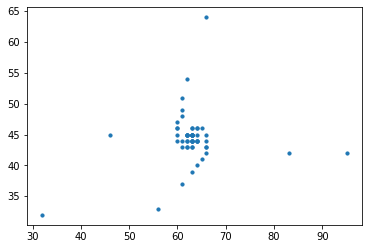

In [45]:
nx = mapp(nx, min(nx), max(nx), 32, 95)
ny = mapp(ny, min(ny), max(ny), 32, 64)
plt.scatter(nx, ny, s=10)

In [46]:
gettmidi(nx, ny, 2,'_jul_3')

midi.Pattern(format=1, resolution=220, tracks=\
[midi.Track(\
  [midi.NoteOnEvent(tick=0, channel=0, data=[46, 90]),
   midi.NoteOffEvent(tick=400, channel=0, data=[46, 0]),
   midi.NoteOnEvent(tick=0, channel=0, data=[63, 88]),
   midi.NoteOffEvent(tick=200, channel=0, data=[63, 0]),
   midi.NoteOnEvent(tick=0, channel=0, data=[63, 88]),
   midi.NoteOffEvent(tick=200, channel=0, data=[63, 0]),
   midi.NoteOnEvent(tick=0, channel=0, data=[63, 88]),
   midi.NoteOffEvent(tick=200, channel=0, data=[63, 0]),
   midi.NoteOnEvent(tick=0, channel=0, data=[63, 88]),
   midi.NoteOffEvent(tick=200, channel=0, data=[63, 0]),
   midi.NoteOnEvent(tick=0, channel=0, data=[63, 88]),
   midi.NoteOffEvent(tick=200, channel=0, data=[63, 0]),
   midi.NoteOnEvent(tick=0, channel=0, data=[62, 88]),
   midi.NoteOffEvent(tick=200, channel=0, data=[62, 0]),
   midi.NoteOnEvent(tick=0, channel=0, data=[62, 88]),
   midi.NoteOffEvent(tick=200, channel=0, data=[62, 0]),
   midi.NoteOnEvent(tick=0, channel=0, dat

In [47]:
julx, july, arx_in, ary_in, arx_out, ary_out, clr = jull(cx=-0.642, cy=0.435, i_max=1000)

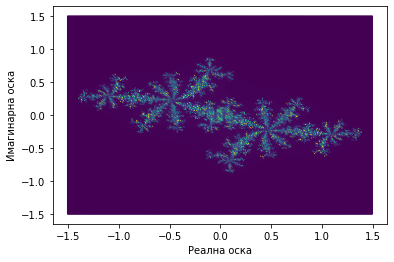

In [48]:
plt.scatter(julx, july, c=clr, s=1)
plt.xlabel("Реална оска")
plt.ylabel("Имагинарна оска")
plt.savefig('Julia_4.tiff', dpi=300, format='tiff')

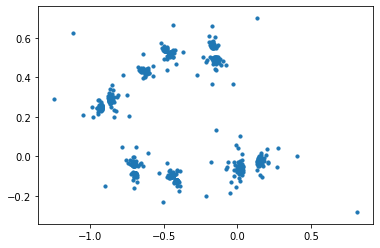

In [49]:
nx = arx_in[0]
ny = ary_in[0]
plt.scatter(nx, ny, s=10)

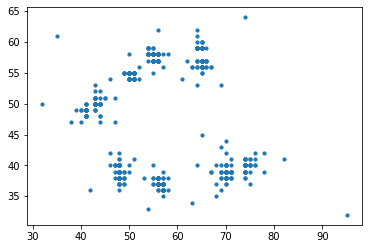

In [50]:
nx = mapp(nx, min(nx), max(nx), 32, 95)
ny = mapp(ny, min(ny), max(ny), 32, 64)
plt.scatter(nx, ny, s=10)

In [51]:
gettmidi(nx, ny, 2,'_jul_4')

midi.Pattern(format=1, resolution=220, tracks=\
[midi.Track(\
  [midi.NoteOnEvent(tick=0, channel=0, data=[32, 100]),
   midi.NoteOffEvent(tick=400, channel=0, data=[32, 0]),
   midi.NoteOnEvent(tick=0, channel=0, data=[56, 74]),
   midi.NoteOffEvent(tick=200, channel=0, data=[56, 0]),
   midi.NoteOnEvent(tick=0, channel=0, data=[48, 76]),
   midi.NoteOffEvent(tick=200, channel=0, data=[48, 0]),
   midi.NoteOnEvent(tick=0, channel=0, data=[41, 100]),
   midi.NoteOffEvent(tick=400, channel=0, data=[41, 0]),
   midi.NoteOnEvent(tick=0, channel=0, data=[50, 108]),
   midi.NoteOffEvent(tick=200, channel=0, data=[50, 0]),
   midi.NoteOnEvent(tick=0, channel=0, data=[55, 114]),
   midi.NoteOffEvent(tick=200, channel=0, data=[55, 0]),
   midi.NoteOnEvent(tick=0, channel=0, data=[57, 74]),
   midi.NoteOffEvent(tick=200, channel=0, data=[57, 0]),
   midi.NoteOnEvent(tick=0, channel=0, data=[48, 76]),
   midi.NoteOffEvent(tick=200, channel=0, data=[48, 0]),
   midi.NoteOnEvent(tick=0, channel=0,